# Tutorial- Deep Learning Using Keras, Python

# 1. 데이터 전처리 파트 

In [28]:
from keras.datasets import mnist #MNIST 

0) Train/Test set의 images(X:픽셀값들) / labels(Y:실제 라벨:0~9) 따로 저장

In [29]:
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
len(train_labels)

60000

In [32]:
test_images.shape

(10000, 28, 28)

In [33]:
len(test_labels)

10000

1) MNIST Training set의 5번째 이미지- python은 0부터 셈 ,  픽셀값 확인 해봄 ( 28 BY 28 이고, 픽셀값이 클수록 해당 부분이 진한 것이다. )

In [34]:
digit=train_images[4] 
digit 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

2) 위에서 저장한 5번째 이미지에 대해 시각화를 해봄: 9 임, 9를 구성하는 부분의 픽셀값이 큰 것임

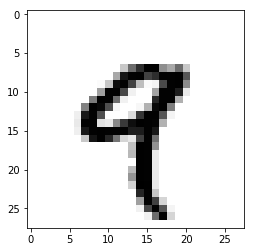

In [35]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# 2. 모델링(학습과정, 3-layer network, softmax classifier : 분류 문제)
- 픽셀값들을 기반으로, 어느 부분이 진한지를 확인해서, 이 숫자가 0~9부터 어느 숫자일 것인지를 예측하는 모델을 만들어보자

0)  입력층, 은닉층, 출력층, 총 3개 레이어 짜리 네트워크를 구성하기 위한 패키지 import

In [36]:
from keras import models
from keras import layers

1) 네트워크 정의, input_shape: 28*28(mnist), 출력층의 노드수: 10개(0부터 9까지를 분류하는 네트워크이므로)

In [37]:
network=models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

loss function(학습에 이용할 손실함수 정의): categorical_crossentropy, optimizer(최적화 방식): rmsprop, 학습중 보여줄 지표: accuracy

In [38]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

2) 모델에 맞게 전처리
- Hidden layer의 input_shape에 맞게 28*28로 reshape, Training sample은 6만개, Test sample은 1만개
- 뉴럴 네트워크는 scale에 민감하기 때문에, scaling 필요함 - 픽셀별로 진하기를 표현하기 위해, 0부터 255까지 값을 갖는데, 255로 나눠서 0부터 1 사이의 값들로 모두 Scaling 해줌

In [39]:
train_images= train_images.reshape((60000,28*28)) 
train_images= train_images.astype('float32')/255 

test_images= test_images.reshape((10000,28*28)) 
test_images= test_images.astype('float32') /255  

3) Y 변수: label(0~9)에 대해, one-hot encoding을 해줘야함 - 케라스 특징

In [40]:
from keras.utils import to_categorical
train_labels= to_categorical(train_labels)
test_labels= to_categorical(test_labels)

4) fit은 학습을 진행하라는 의미, train_images: X(픽셀값들), train_labels: Y(0~9), 
batch size: 60,000개 중 128개씩 나눠서 학습, 
    epoch: 60,000개 전부 학습을 5번 반복
- 참고: 1. batch size =128 (미니배치방법) 나눠서 학습 , 2. 배치방법:한꺼번에 모든 샘플 한꺼번에 학습, 3. sgd: 확률적으로 1개씩 학습

In [41]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 25us/step - loss: 0.2541 - acc: 0.9266
Epoch 2/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.1018 - acc: 0.9699
Epoch 3/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0678 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0494 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 1s 22us/step - loss: 0.0377 - acc: 0.9889


# 3. 모델 검증(Using test set, by accuracy)

0) 위에서 학습시킨 'network'라는 모델을, 미리 정의해둔 test_images(new X), test_labels(new Y)로 모델 검증 

In [42]:
test_loss, test_acc= network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 32us/step


1) 모델 검증 결과 확인 : ACCURACY: XX

In [43]:
print('test_acc:', test_acc) 

test_acc: 0.9784
